# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

nascvivos= pd.read_csv('b1abb33c4f.csv')

nascvivos.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

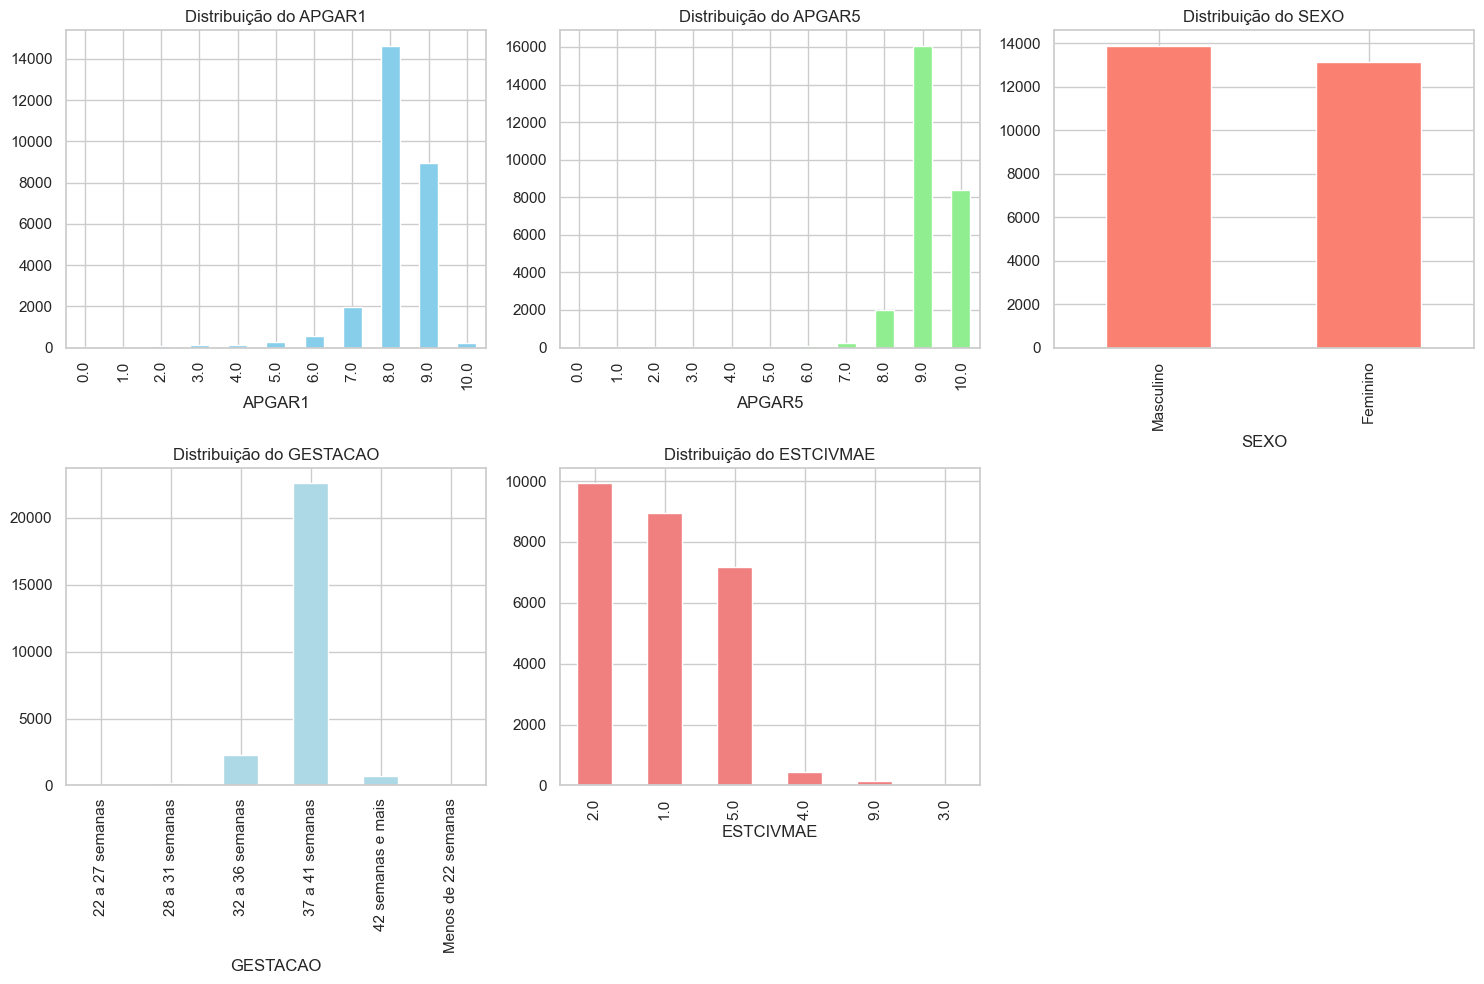

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 linhas, 3 colunas

# Gráfico de barras para a variável APGAR1
nascvivos['APGAR1'].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Distribuição do APGAR1')

# Gráfico de barras para a variável APGAR5
nascvivos['APGAR5'].value_counts().sort_index().plot(kind='bar', color='lightgreen', ax=axs[0, 1])
axs[0, 1].set_title('Distribuição do APGAR5')

# Gráfico de barras para a variável SEXO
nascvivos['SEXO'].value_counts().plot(kind='bar', color='salmon', ax=axs[0, 2])
axs[0, 2].set_title('Distribuição do SEXO')

# Gráfico de barras para a variável GESTACAO
nascvivos['GESTACAO'].value_counts().sort_index().plot(kind='bar', color='lightblue', ax=axs[1, 0])
axs[1, 0].set_title('Distribuição do GESTACAO')

# Gráfico de barras para a variável ESTCIVMAE
nascvivos['ESTCIVMAE'].value_counts().plot(kind='bar', color='lightcoral', ax=axs[1, 1])
axs[1, 1].set_title('Distribuição do ESTCIVMAE')

# Ocultar o subplot extra
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

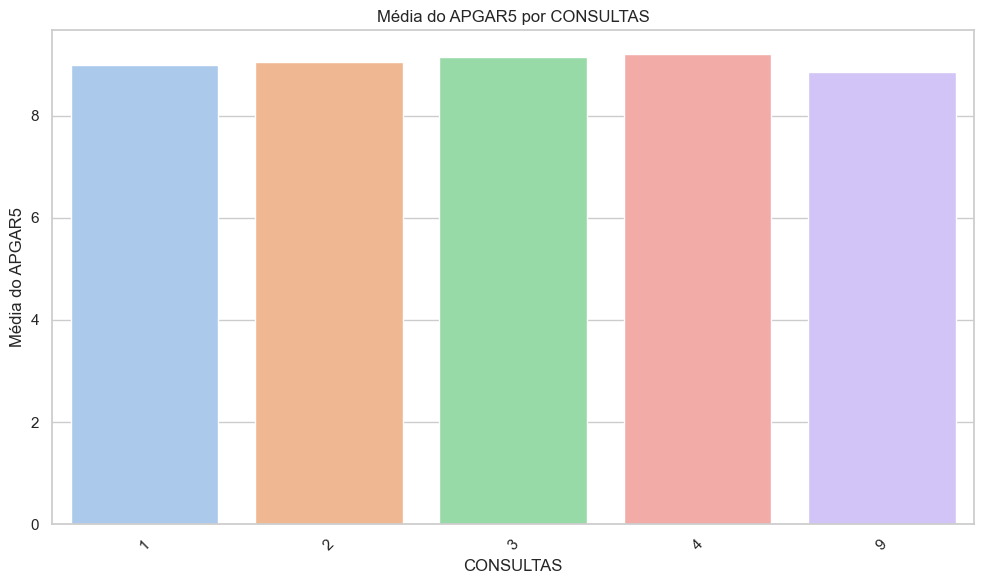

In [33]:
apg5_por_consultas = nascvivos.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criando o gráfico de barras com Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='CONSULTAS', y='APGAR5', data=apg5_por_consultas, palette='pastel')
plt.title('Média do APGAR5 por CONSULTAS')
plt.xlabel('CONSULTAS')
plt.ylabel('Média do APGAR5')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.tight_layout()
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

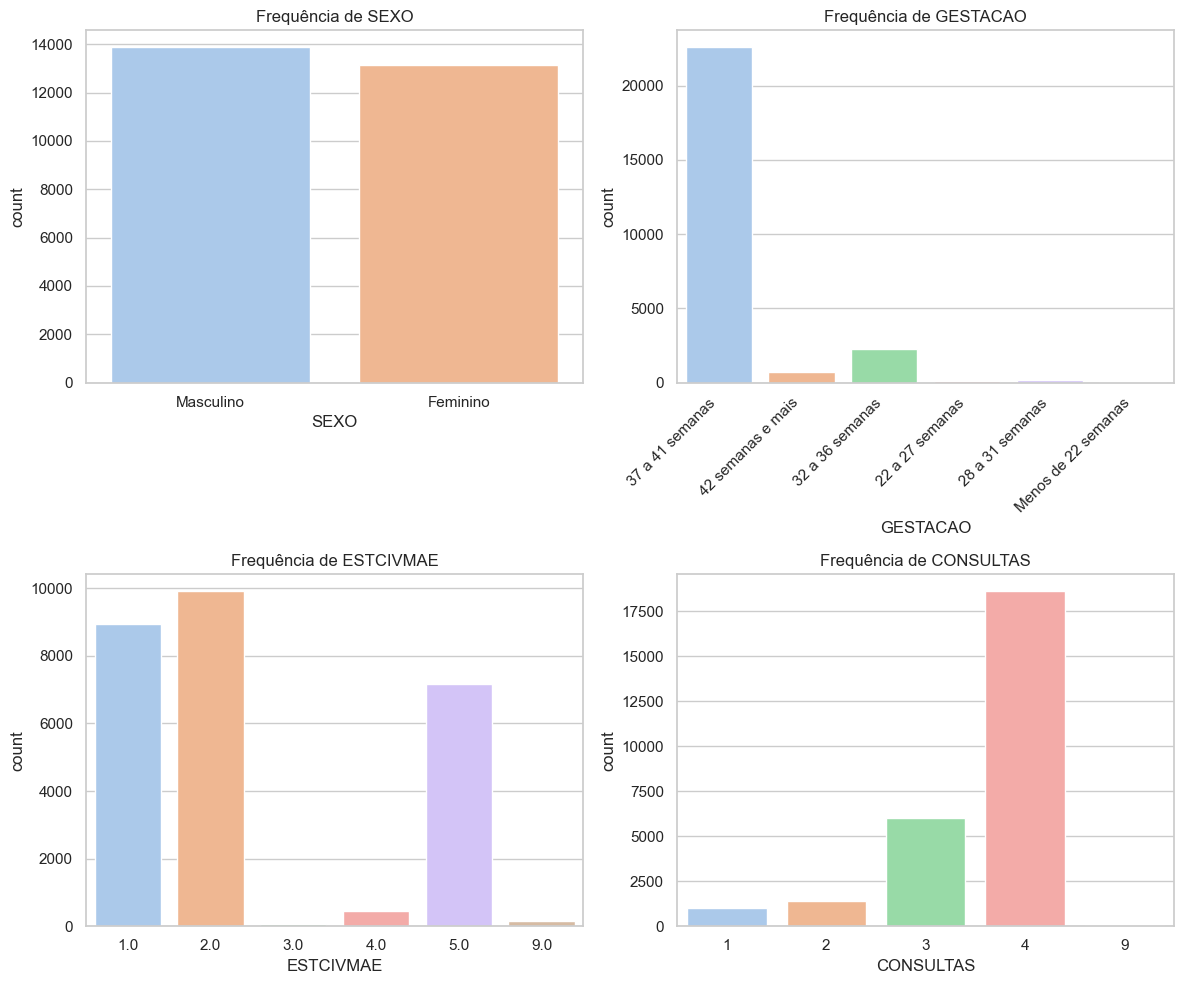

In [34]:
sns.set(style="whitegrid")

# Criando um painel de 2x2 para os gráficos
plt.figure(figsize=(12, 10))

# Gráfico 1 - Frequência de SEXO
plt.subplot(2, 2, 1)
sns.countplot(x='SEXO', data=nascvivos, palette='pastel')
plt.title('Frequência de SEXO')

# Gráfico 2 - Frequência de GESTACAO com rotação dos rótulos
plt.subplot(2, 2, 2)
gestacao_plot = sns.countplot(x='GESTACAO', data=nascvivos, palette='pastel')
plt.title('Frequência de GESTACAO')
gestacao_plot.set_xticklabels(gestacao_plot.get_xticklabels(), rotation=45, ha='right')  # Rotacionar rótulos em 45 graus

# Gráfico 3 - Frequência de ESTCIVMAE
plt.subplot(2, 2, 3)
sns.countplot(x='ESTCIVMAE', data=nascvivos, palette='pastel')
plt.title('Frequência de ESTCIVMAE')

# Gráfico 4 - Frequência de CONSULTAS
plt.subplot(2, 2, 4)
sns.countplot(x='CONSULTAS', data=nascvivos, palette='pastel')
plt.title('Frequência de CONSULTAS')

plt.tight_layout()
plt.show()

In [35]:
#validando alguns numeros apresentados

nascvivos['CONSULTAS'].value_counts()

CONSULTAS
4    18624
3     5988
2     1379
1      986
9       51
Name: count, dtype: int64

In [42]:
filtro = nascvivos[nascvivos['CONSULTAS']==9]

filtro['APGAR5'].mean()

8.86